In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Dataset Analysis

We use [Gesture Recognition Dataset](https://www.kaggle.com/datasets/abhishek14398/gesture-recognition-dataset/data) from kaggle.

| Gesture | Label |
| ------- | ----- |
| Left Swipe | 0 |
| Right Swipe| 1 |
| Stop | 2 |
| Thumbs Down | 3 |
| Thumbs Up | 4 |

In [ ]:
data_path = "./gesture-recognition-dataset/"


# Define data paths
train_csv_path = os.path.join(data_path, "train.csv")
val_csv_path = os.path.join(data_path, "val.csv")
train_data_path = os.path.join(data_path, "train")
val_data_path = os.path.join(data_path, "val")

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)

# Inspect the data
print("Train CSV:")
print(train_df.head())
print("\nValidation CSV:")
print(val_df.head())


Train CSV:
  WIN_20180925_17_08_43_Pro_Left_Swipe_new;Left_Swipe_new;0
0  WIN_20180925_17_18_28_Pro_Left_Swipe_new;Left_...       
1  WIN_20180925_17_18_56_Pro_Left_Swipe_new;Left_...       
2  WIN_20180925_17_19_51_Pro_Left_Swipe_new;Left_...       
3  WIN_20180925_17_20_14_Pro_Left_Swipe_new;Left_...       
4  WIN_20180925_17_21_28_Pro_Left_Swipe_new;Left_...       

Validation CSV:
  WIN_20180925_17_17_04_Pro_Left_Swipe_new;Left_Swipe_new;0
0  WIN_20180925_17_43_01_Pro_Left_Swipe_new;Left_...       
1  WIN_20180925_18_01_40_Pro_Left_Swipe_new;Left_...       
2  WIN_20180925_18_03_21_Pro_Left_Swipe_new;Left_...       
3  WIN_20180926_16_46_22_Pro_Left_Swipe_new;Left_...       
4  WIN_20180926_16_47_09_Pro_Left_Swipe_new;Left_...       


In [ ]:
# Example: Inspect the contents of a specific folder
train_folder = os.path.join(data_path, "train")
example_subfolder = os.listdir(train_folder)[0]
example_path = os.path.join(train_folder, example_subfolder)

print(f"Example Subfolder: {example_subfolder}")
print(f"Images in Subfolder: {os.listdir(example_path)}")


Example Subfolder: WIN_20180926_16_51_21_Pro_Thumbs_Down_new
Images in Subfolder: ['WIN_20180926_16_51_21_Pro_00005.png', 'WIN_20180926_16_51_21_Pro_00011.png', 'WIN_20180926_16_51_21_Pro_00039.png', 'WIN_20180926_16_51_21_Pro_00007.png', 'WIN_20180926_16_51_21_Pro_00013.png', 'WIN_20180926_16_51_21_Pro_00017.png', 'WIN_20180926_16_51_21_Pro_00003.png', 'WIN_20180926_16_51_21_Pro_00015.png', 'WIN_20180926_16_51_21_Pro_00029.png', 'WIN_20180926_16_51_21_Pro_00059.png', 'WIN_20180926_16_51_21_Pro_00061.png', 'WIN_20180926_16_51_21_Pro_00049.png', 'WIN_20180926_16_51_21_Pro_00047.png', 'WIN_20180926_16_51_21_Pro_00053.png', 'WIN_20180926_16_51_21_Pro_00045.png', 'WIN_20180926_16_51_21_Pro_00051.png', 'WIN_20180926_16_51_21_Pro_00055.png', 'WIN_20180926_16_51_21_Pro_00041.png', 'WIN_20180926_16_51_21_Pro_00057.png', 'WIN_20180926_16_51_21_Pro_00043.png', 'WIN_20180926_16_51_21_Pro_00019.png', 'WIN_20180926_16_51_21_Pro_00031.png', 'WIN_20180926_16_51_21_Pro_00025.png', 'WIN_20180926_16_51_

In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm

# Preprocess images in a single subfolder (video)
def preprocess_images(folder_path):
    images = []
    for img_file in sorted(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        images.append(np.array(img))
    return np.array(images)

# Preprocess all videos in a dataset (train or val)
def preprocess_dataset(csv_path, data_path):
    # Load the CSV file
    df = pd.read_csv(csv_path,sep=";", header=None, names=['subfolder', 'gesture', 'label'])

    # Store preprocessed data and labels
    videos = []
    labels = []

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing videos"):
        subfolder = row['subfolder']
        label = row['label']

        video_path = os.path.join(data_path, subfolder)
        video_data = preprocess_images(video_path)

        videos.append(video_data)
        labels.append(label)

    return videos, np.array(labels)

train_videos, train_labels = preprocess_dataset(train_csv_path, train_data_path)
print(f"Train Data Number: {len(train_videos)}, Train Labels Shape: {train_labels.shape}")

val_videos, val_labels = preprocess_dataset(val_csv_path, val_data_path)
print(f"Validation Data Shape: {len(val_videos)}, Validation Labels Shape: {val_labels.shape}")


Processing videos: 100%|██████████| 663/663 [00:56<00:00, 11.66it/s]


Train Data Number: 663, Train Labels Shape: (663,)


Processing videos: 100%|██████████| 100/100 [00:08<00:00, 11.36it/s]

Validation Data Shape: 100, Validation Labels Shape: (100,)


In [ ]:
print(val_labels[0])

0


In [ ]:

combined_train_data = {f"video_{i}": {"video": video, "label": label}
                 for i, (video, label) in enumerate(zip(train_videos, train_labels))}

np.savez("./gesture-recognition-dataset/train_data_combined.npz", **combined_train_data)

combined_val_data = {f"video_{i}": {"video": video, "label": label}
                 for i, (video, label) in enumerate(zip(val_videos, val_labels))}


np.savez("./gesture-recognition-dataset/val_data_combined.npz", **combined_val_data)




In [ ]:
val_data = np.load("./gesture-recognition-dataset/val_data_combined.npz", allow_pickle=True)

val_data["video_0"].item().keys()
val_data["video_0"].item()["video"].shape
val_data["video_0"].item()["label"]


0

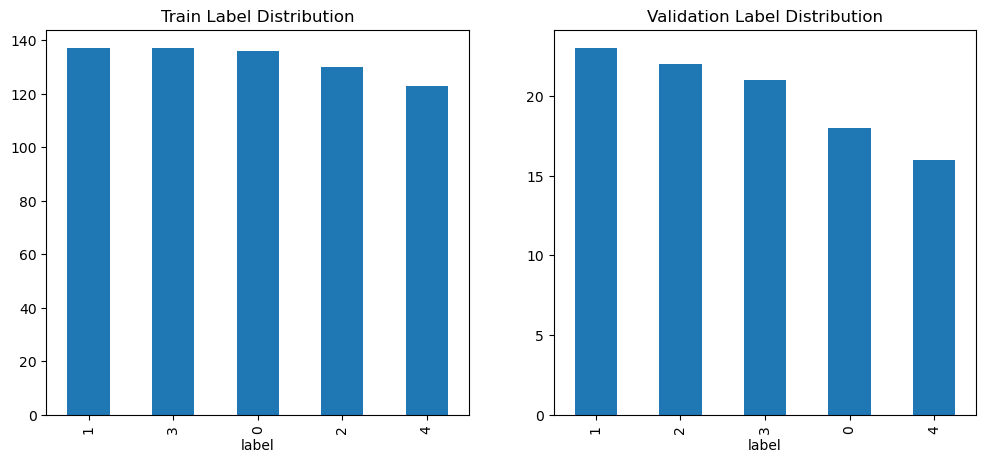

In [ ]:
import matplotlib.pyplot as plt


train_label_counts = pd.read_csv(train_csv_path,sep=";", header=None, names=['subfolder', 'gesture', 'label'])['label'].value_counts()
val_label_counts = pd.read_csv(val_csv_path,sep=";", header=None, names=['subfolder', 'gesture', 'label'])['label'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
train_label_counts.plot(kind='bar', ax=axes[0], title="Train Label Distribution")
val_label_counts.plot(kind='bar', ax=axes[1], title="Validation Label Distribution")
plt.show()


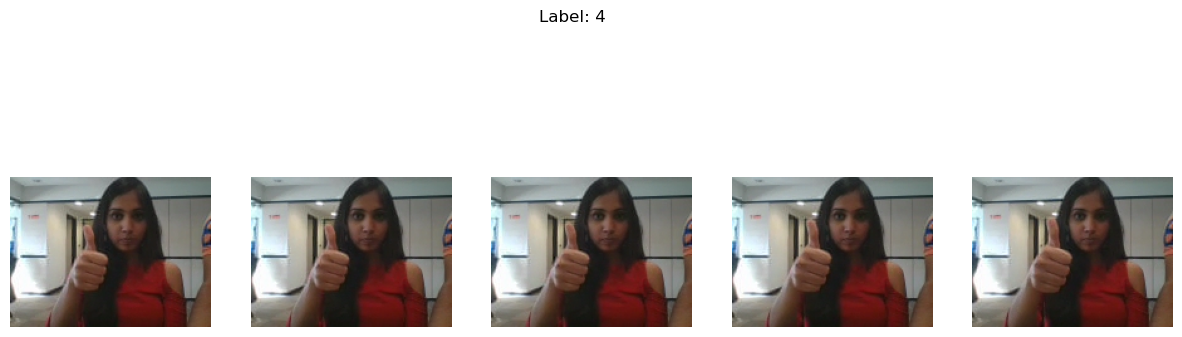

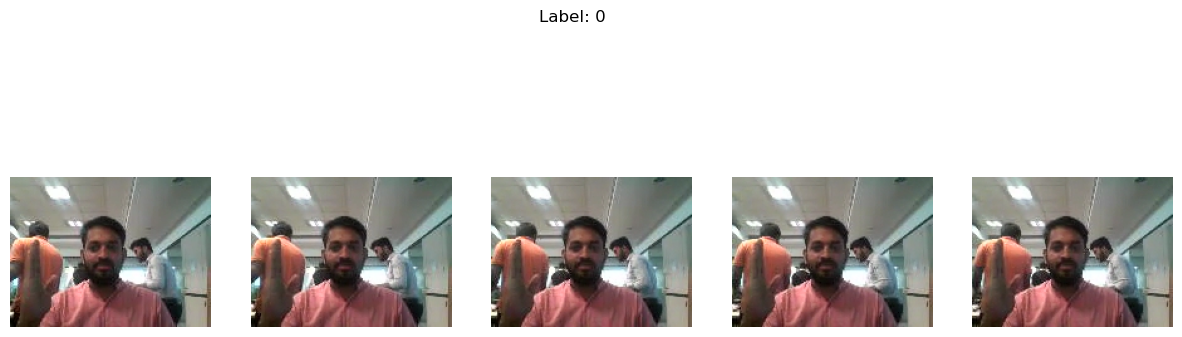

In [ ]:
import random
import matplotlib.pyplot as plt

def preview_video(videos, labels, index=None):
    if index is None:
        index = random.randint(0, len(videos) - 1)
    video = videos[index]
    label = labels[index]

    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        axes[i].imshow(video[i])
        axes[i].axis('off')
    plt.suptitle(f"Label: {label}")
    plt.show()

preview_video(train_videos, train_labels)

preview_video(val_videos, val_labels)


In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class VideoDataset(Dataset):
    def __init__(self, npz_path, transform=None, target_size=(224, 224)):
        """
        PyTorch Dataset for loading videos and labels with fixed frame count.

        Args:
            npz_path (str): Path to the .npz file.
            transform (callable, optional): Transformations to apply to video frames.
            target_size (tuple): Target frame size (height, width) for resizing.
        """
        self.data = np.load(npz_path, allow_pickle=True)
        self.keys = list(self.data.keys())  # All keys in the .npz file
        self.transform = transform
        self.target_size = target_size

    def __len__(self):
        return len(self.keys)

    def __getitem__(self, idx):
        # Load video and label from the .npz file
        key = self.keys[idx]
        item = self.data[key].item()  # Extract dictionary from object array
        video = item["video"]  # NumPy array, shape: (30, height, width, channels)
        label = item["label"]

        # Process video frames
        video = self._process_video(video)
        video = video.permute(1,0,2,3)  # 从 [T, H, W, C] 转换为 [C, T, H, W]

        label = int(label)
        # Convert label to tensor
        label = torch.tensor(label, dtype=torch.long)

        return video, label

    def _process_video(self, video):
        """
        Process video frames: resize frames and apply optional transformations.
        """
        processed_frames = []

        for frame in video:
            # Resize each frame to target size
            frame = transforms.ToPILImage()(frame)  # Convert NumPy array to PIL image
            frame = frame.resize(self.target_size)  # Resize to target size
            frame = transforms.ToTensor()(frame)   # Convert to Tensor
            if self.transform:
                frame = self.transform(frame)      # Apply additional transforms
            processed_frames.append(frame)

        # Convert processed frames to a tensor
        video_tensor = torch.stack(processed_frames)

        return video_tensor


In [ ]:
!ls

final-project.ipynb  gesture-recognition-dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ./drive/MyDrive/code/Final-Project/

/content/drive/MyDrive/code/Final-Project


In [ ]:
train_dataset = VideoDataset(
    npz_path="./gesture-recognition-dataset/train_data_combined.npz",
    transform=transforms.Normalize(mean=[0.5], std=[0.5]),  # Normalize frames
    target_size=(224, 224)
)

val_dataset = VideoDataset(
    npz_path="./gesture-recognition-dataset/val_data_combined.npz",
    transform=transforms.Normalize(mean=[0.5], std=[0.5]),  # Normalize frames
    target_size=(224, 224)
)

print(f"Dataset size: {len(train_dataset)}")

# check a sample
video, label = train_dataset[0]
print(f"Video shape: {video.shape}, Label: {label}")

video, label = val_dataset[0]
print(f"Video shape: {video.shape}, Label: {label}")

Dataset size: 663
Video shape: torch.Size([3, 30, 224, 224]), Label: 0
Video shape: torch.Size([3, 30, 224, 224]), Label: 0


In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=0)
for batch in train_loader:
    print(batch[0].shape) # input data
    print(batch[1].shape)  # label
    break
for batch in val_loader:
    print(batch[0].shape)
    print(batch[1].shape)
    break


torch.Size([4, 3, 30, 224, 224])
torch.Size([4])
torch.Size([4, 3, 30, 224, 224])
torch.Size([4])


# Model Design

In [ ]:
import torch
import torch.nn as nn

class Conv3DModel(nn.Module):
    def __init__(self, num_classes=10):
        super(Conv3DModel, self).__init__()
        self.conv1 = nn.Conv3d(in_channels=3, out_channels=16, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.conv2 = nn.Conv3d(in_channels=16, out_channels=32, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.pool = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)
        self.fc = None  # Placeholder; initialized later based on input size

    def forward(self, x):
        # Conv3D + ReLU + MaxPooling
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))

        # Dynamically calculate feature size after conv and pooling
        if self.fc is None:
            # x.size(): [batch_size, channels, T', H', W']
            flattened_dim = x.size(1) * x.size(2) * x.size(3) * x.size(4)
            self.fc = nn.Linear(flattened_dim, 10).to(x.device)

        # Flatten and pass through FC
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x



In [ ]:
import torch
import torch.nn as nn

class FlexibleConv3DModel(nn.Module):
    def __init__(self, num_classes=5, num_conv_layers=3, initial_channels=16, dropout_rate=0.5):
        """
        Args:
            num_classes: Number of output classes for classification.
            num_conv_layers: Number of convolutional layers in the model.
            initial_channels: Number of output channels for the first conv layer.
        """
        super(FlexibleConv3DModel, self).__init__()
        self.num_conv_layers = num_conv_layers
        self.layers = nn.ModuleList()
        self.dropout_rate = dropout_rate

        in_channels = 3  # RGB input channels
        out_channels = initial_channels

        # Create convolutional layers dynamically
        for i in range(num_conv_layers):
            self.layers.append(
                nn.Conv3d(in_channels=in_channels, out_channels=out_channels, kernel_size=(3, 3, 3), stride=1, padding=1)
            )
            self.layers.append(nn.ReLU())
            self.layers.append(nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2))
            if i >  num_conv_layers // 2:
                self.layers.append(nn.Dropout3d(p=dropout_rate))
            in_channels = out_channels
            out_channels *= 2  # Double channels after each layer

        self.fc = None  # Placeholder; initialized later based on input size
        self.num_classes = num_classes

    def forward(self, x):
        # Apply convolutional layers dynamically
        for layer in self.layers:
            x = layer(x)

        # Dynamically calculate feature size for fully connected layer
        if self.fc is None:
            flattened_dim = x.size(1) * x.size(2) * x.size(3) * x.size(4)
            self.fc = nn.Sequential(
                nn.Linear(flattened_dim, self.num_classes),
                nn.Dropout(p=self.dropout_rate)  # Dropout before the final layer
            ).to(x.device)


        # Flatten and pass through FC
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


# Training

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.transforms import Normalize
from tqdm import tqdm

def train_model(model, train_loader, val_loader=None, num_epochs=10, device='cuda', lr=0.001):
    """
    Train a given model using the specified dataset and parameters.

    Args:
        model (nn.Module): The model to train.
        train_loader (DataLoader): DataLoader for the training dataset.
        val_loader (DataLoader, optional): DataLoader for the validation dataset.
        num_epochs (int): Number of epochs to train.
        device (str): Device to train on ('cuda' or 'cpu').
        lr (float): Learning rate for the optimizer.

    Returns:
        model: The trained model.
    """
    # Move model to the specified device
    model = model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        print(f"Epoch {epoch + 1}/{num_epochs}")
        for videos, labels in tqdm(train_loader):
            # Move data to device
            videos, labels = videos.to(device), labels.to(device)

            # Forward pass
            outputs = model(videos)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update training statistics
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100. * correct / total
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")

        # Validation
        if val_loader:
            model.eval()
            val_loss = 0
            correct = 0
            total = 0
            with torch.no_grad():
                for videos, labels in val_loader:
                    videos, labels = videos.to(device), labels.to(device)
                    outputs = model(videos)
                    loss = criterion(outputs, labels)

                    val_loss += loss.item()
                    _, predicted = outputs.max(1)
                    total += labels.size(0)
                    correct += predicted.eq(labels).sum().item()

            val_acc = 100. * correct / total
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")

    return model


In [ ]:
conv3d_model = Conv3DModel(num_classes=5)

trained_conv3d_model = train_model(
    model=conv3d_model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    lr=0.001
)


Epoch 1/10


100%|██████████| 166/166 [04:14<00:00,  1.53s/it]


Train Loss: 317.8514, Train Accuracy: 16.14%
Validation Loss: 46.0804, Validation Accuracy: 23.00%
Epoch 2/10


100%|██████████| 166/166 [04:08<00:00,  1.50s/it]


Train Loss: 292.5781, Train Accuracy: 23.98%
Validation Loss: 43.1202, Validation Accuracy: 25.00%
Epoch 3/10


100%|██████████| 166/166 [04:10<00:00,  1.51s/it]


Train Loss: 275.3558, Train Accuracy: 29.41%
Validation Loss: 40.9059, Validation Accuracy: 29.00%
Epoch 4/10


100%|██████████| 166/166 [04:09<00:00,  1.50s/it]


Train Loss: 252.5574, Train Accuracy: 35.29%
Validation Loss: 37.4626, Validation Accuracy: 31.00%
Epoch 5/10


100%|██████████| 166/166 [04:12<00:00,  1.52s/it]


Train Loss: 234.5299, Train Accuracy: 41.63%
Validation Loss: 34.9413, Validation Accuracy: 43.00%
Epoch 6/10


100%|██████████| 166/166 [04:12<00:00,  1.52s/it]


Train Loss: 221.2018, Train Accuracy: 44.95%
Validation Loss: 34.3305, Validation Accuracy: 45.00%
Epoch 7/10


100%|██████████| 166/166 [04:25<00:00,  1.60s/it]


Train Loss: 212.3565, Train Accuracy: 47.96%
Validation Loss: 33.0422, Validation Accuracy: 47.00%
Epoch 8/10


100%|██████████| 166/166 [04:52<00:00,  1.76s/it]


Train Loss: 204.5171, Train Accuracy: 50.53%
Validation Loss: 33.5953, Validation Accuracy: 43.00%
Epoch 9/10


100%|██████████| 166/166 [04:45<00:00,  1.72s/it]


Train Loss: 194.9044, Train Accuracy: 55.66%
Validation Loss: 33.0282, Validation Accuracy: 42.00%
Epoch 10/10


100%|██████████| 166/166 [04:41<00:00,  1.69s/it]


Train Loss: 190.5452, Train Accuracy: 55.20%
Validation Loss: 33.6092, Validation Accuracy: 46.00%


In [ ]:
conv3d_model = FlexibleConv3DModel(num_classes=5, num_conv_layers=3, initial_channels=16)
train_model(
    model=conv3d_model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    lr=0.001
)

Epoch 1/10


100%|██████████| 166/166 [04:56<00:00,  1.79s/it]


Train Loss: 246.0930, Train Accuracy: 31.83%
Validation Loss: 30.9317, Validation Accuracy: 43.00%
Epoch 2/10


100%|██████████| 166/166 [04:51<00:00,  1.75s/it]


Train Loss: 179.9834, Train Accuracy: 55.20%
Validation Loss: 26.9396, Validation Accuracy: 60.00%
Epoch 3/10


100%|██████████| 166/166 [05:55<00:00,  2.14s/it]


Train Loss: 144.9926, Train Accuracy: 65.91%
Validation Loss: 25.2252, Validation Accuracy: 58.00%
Epoch 4/10


100%|██████████| 166/166 [05:23<00:00,  1.95s/it]


Train Loss: 112.4667, Train Accuracy: 74.36%
Validation Loss: 23.6953, Validation Accuracy: 61.00%
Epoch 5/10


100%|██████████| 166/166 [04:52<00:00,  1.76s/it]


Train Loss: 92.7552, Train Accuracy: 81.00%
Validation Loss: 24.5531, Validation Accuracy: 63.00%
Epoch 6/10


100%|██████████| 166/166 [04:42<00:00,  1.70s/it]


Train Loss: 80.1551, Train Accuracy: 81.90%
Validation Loss: 23.1112, Validation Accuracy: 69.00%
Epoch 7/10


100%|██████████| 166/166 [04:47<00:00,  1.73s/it]


Train Loss: 55.7570, Train Accuracy: 87.93%
Validation Loss: 26.4308, Validation Accuracy: 67.00%
Epoch 8/10


100%|██████████| 166/166 [04:47<00:00,  1.73s/it]


Train Loss: 37.8444, Train Accuracy: 91.86%
Validation Loss: 30.7706, Validation Accuracy: 68.00%
Epoch 9/10


100%|██████████| 166/166 [04:47<00:00,  1.73s/it]


Train Loss: 32.1710, Train Accuracy: 93.97%
Validation Loss: 29.6935, Validation Accuracy: 69.00%
Epoch 10/10


100%|██████████| 166/166 [04:47<00:00,  1.73s/it]


Train Loss: 20.3693, Train Accuracy: 96.23%
Validation Loss: 30.7036, Validation Accuracy: 68.00%


FlexibleConv3DModel(
  (layers): ModuleList(
    (0): Conv3d(3, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): ReLU()
    (5): MaxPool3d(kernel_size=(2, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (7): ReLU()
    (8): MaxPool3d(kernel_size=(2, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=150528, out_features=5, bias=True)
)

In [ ]:
conv3d_model = FlexibleConv3DModel(num_classes=5, num_conv_layers=4, initial_channels=16)
train_model(
    model=conv3d_model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    lr=0.001
)

Epoch 1/10


100%|██████████| 166/166 [05:00<00:00,  1.81s/it]


Train Loss: 248.1485, Train Accuracy: 30.47%
Validation Loss: 27.4756, Validation Accuracy: 55.00%
Epoch 2/10


100%|██████████| 166/166 [05:07<00:00,  1.85s/it]


Train Loss: 159.9598, Train Accuracy: 61.99%
Validation Loss: 26.3044, Validation Accuracy: 60.00%
Epoch 3/10


100%|██████████| 166/166 [04:55<00:00,  1.78s/it]


Train Loss: 109.6957, Train Accuracy: 76.62%
Validation Loss: 17.1855, Validation Accuracy: 75.00%
Epoch 4/10


100%|██████████| 166/166 [04:49<00:00,  1.74s/it]


Train Loss: 72.3756, Train Accuracy: 81.75%
Validation Loss: 16.8004, Validation Accuracy: 78.00%
Epoch 5/10


100%|██████████| 166/166 [04:50<00:00,  1.75s/it]


Train Loss: 38.1813, Train Accuracy: 91.40%
Validation Loss: 31.6446, Validation Accuracy: 71.00%
Epoch 6/10


100%|██████████| 166/166 [05:13<00:00,  1.89s/it]


Train Loss: 28.1076, Train Accuracy: 93.36%
Validation Loss: 27.1730, Validation Accuracy: 77.00%
Epoch 7/10


100%|██████████| 166/166 [05:00<00:00,  1.81s/it]


Train Loss: 13.5218, Train Accuracy: 97.89%
Validation Loss: 31.6245, Validation Accuracy: 76.00%
Epoch 8/10


100%|██████████| 166/166 [04:52<00:00,  1.76s/it]


Train Loss: 4.8784, Train Accuracy: 99.40%
Validation Loss: 40.6097, Validation Accuracy: 74.00%
Epoch 9/10


100%|██████████| 166/166 [04:52<00:00,  1.76s/it]


Train Loss: 0.5283, Train Accuracy: 100.00%
Validation Loss: 42.2280, Validation Accuracy: 74.00%
Epoch 10/10


100%|██████████| 166/166 [05:11<00:00,  1.88s/it]


Train Loss: 0.1920, Train Accuracy: 100.00%
Validation Loss: 43.7653, Validation Accuracy: 75.00%


FlexibleConv3DModel(
  (layers): ModuleList(
    (0): Conv3d(3, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): ReLU()
    (5): MaxPool3d(kernel_size=(2, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (7): ReLU()
    (8): MaxPool3d(kernel_size=(2, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (10): ReLU()
    (11): MaxPool3d(kernel_size=(2, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=25088, out_features=5, bias=True)
)

In [ ]:
conv3d_model = FlexibleConv3DModel(num_classes=5, num_conv_layers=4, initial_channels=16, dropout_rate=0.5)
conv3d_4layer_withdropout = train_model(
    model=conv3d_model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    lr=0.001
)

Epoch 1/10


100%|██████████| 166/166 [05:15<00:00,  1.90s/it]


Train Loss: 267.8743, Train Accuracy: 21.27%
Validation Loss: 39.9950, Validation Accuracy: 37.00%
Epoch 2/10


100%|██████████| 166/166 [05:04<00:00,  1.83s/it]


Train Loss: 265.2949, Train Accuracy: 23.53%
Validation Loss: 38.3827, Validation Accuracy: 42.00%
Epoch 3/10


100%|██████████| 166/166 [05:10<00:00,  1.87s/it]


Train Loss: 252.7272, Train Accuracy: 30.32%
Validation Loss: 33.2202, Validation Accuracy: 61.00%
Epoch 4/10


100%|██████████| 166/166 [05:31<00:00,  2.00s/it]


Train Loss: 235.6166, Train Accuracy: 37.10%
Validation Loss: 31.0501, Validation Accuracy: 54.00%
Epoch 5/10


100%|██████████| 166/166 [05:31<00:00,  2.00s/it]


Train Loss: 218.4971, Train Accuracy: 41.63%
Validation Loss: 29.9108, Validation Accuracy: 58.00%
Epoch 6/10


100%|██████████| 166/166 [05:38<00:00,  2.04s/it]


Train Loss: 208.3857, Train Accuracy: 46.76%
Validation Loss: 28.7998, Validation Accuracy: 62.00%
Epoch 7/10


100%|██████████| 166/166 [05:25<00:00,  1.96s/it]


Train Loss: 198.9331, Train Accuracy: 47.51%
Validation Loss: 24.2420, Validation Accuracy: 73.00%
Epoch 8/10


100%|██████████| 166/166 [05:24<00:00,  1.95s/it]


Train Loss: 190.1861, Train Accuracy: 49.77%
Validation Loss: 22.4930, Validation Accuracy: 72.00%
Epoch 9/10


100%|██████████| 166/166 [05:16<00:00,  1.90s/it]


Train Loss: 177.8540, Train Accuracy: 53.54%
Validation Loss: 21.6156, Validation Accuracy: 72.00%
Epoch 10/10


100%|██████████| 166/166 [05:27<00:00,  1.97s/it]


Train Loss: 182.8378, Train Accuracy: 50.83%
Validation Loss: 19.8207, Validation Accuracy: 77.00%


In [ ]:
conv3d_model = FlexibleConv3DModel(num_classes=5, num_conv_layers=4, initial_channels=16, dropout_rate=0.5)
conv3d_4layer_withdropout = train_model(
    model=conv3d_model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=20,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    lr=0.001
)

Epoch 1/20


100%|██████████| 166/166 [02:07<00:00,  1.31it/s]


Train Loss: 267.4130, Train Accuracy: 20.81%
Validation Loss: 38.4414, Validation Accuracy: 35.00%
Epoch 2/20


100%|██████████| 166/166 [01:39<00:00,  1.67it/s]


Train Loss: 254.3801, Train Accuracy: 31.52%
Validation Loss: 32.6157, Validation Accuracy: 53.00%
Epoch 3/20


100%|██████████| 166/166 [01:38<00:00,  1.68it/s]


Train Loss: 226.1928, Train Accuracy: 41.03%
Validation Loss: 27.5896, Validation Accuracy: 66.00%
Epoch 4/20


100%|██████████| 166/166 [01:39<00:00,  1.67it/s]


Train Loss: 221.6424, Train Accuracy: 37.10%
Validation Loss: 26.3960, Validation Accuracy: 67.00%
Epoch 5/20


100%|██████████| 166/166 [01:41<00:00,  1.64it/s]


Train Loss: 203.3075, Train Accuracy: 47.06%
Validation Loss: 24.5264, Validation Accuracy: 76.00%
Epoch 6/20


100%|██████████| 166/166 [01:40<00:00,  1.65it/s]


Train Loss: 201.7124, Train Accuracy: 47.06%
Validation Loss: 22.5240, Validation Accuracy: 77.00%
Epoch 7/20


100%|██████████| 166/166 [01:39<00:00,  1.66it/s]


Train Loss: 191.6061, Train Accuracy: 50.98%
Validation Loss: 22.9048, Validation Accuracy: 65.00%
Epoch 8/20


100%|██████████| 166/166 [01:40<00:00,  1.66it/s]


Train Loss: 187.2374, Train Accuracy: 50.53%
Validation Loss: 22.0297, Validation Accuracy: 74.00%
Epoch 9/20


100%|██████████| 166/166 [01:41<00:00,  1.64it/s]


Train Loss: 174.5752, Train Accuracy: 54.00%
Validation Loss: 20.9778, Validation Accuracy: 77.00%
Epoch 10/20


100%|██████████| 166/166 [01:41<00:00,  1.63it/s]


Train Loss: 180.2319, Train Accuracy: 54.00%
Validation Loss: 19.4256, Validation Accuracy: 76.00%
Epoch 11/20


100%|██████████| 166/166 [01:40<00:00,  1.66it/s]


Train Loss: 161.8286, Train Accuracy: 54.60%
Validation Loss: 17.5374, Validation Accuracy: 77.00%
Epoch 12/20


100%|██████████| 166/166 [01:40<00:00,  1.66it/s]


Train Loss: 155.7694, Train Accuracy: 58.82%
Validation Loss: 16.0359, Validation Accuracy: 79.00%
Epoch 13/20


100%|██████████| 166/166 [01:40<00:00,  1.64it/s]


Train Loss: 159.5212, Train Accuracy: 55.35%
Validation Loss: 17.6100, Validation Accuracy: 78.00%
Epoch 14/20


100%|██████████| 166/166 [01:40<00:00,  1.64it/s]


Train Loss: 156.8298, Train Accuracy: 56.56%
Validation Loss: 16.5724, Validation Accuracy: 79.00%
Epoch 15/20


100%|██████████| 166/166 [01:40<00:00,  1.65it/s]


Train Loss: 150.8915, Train Accuracy: 56.56%
Validation Loss: 14.5292, Validation Accuracy: 84.00%
Epoch 16/20


100%|██████████| 166/166 [01:40<00:00,  1.66it/s]


Train Loss: 141.4076, Train Accuracy: 61.24%
Validation Loss: 14.7729, Validation Accuracy: 80.00%
Epoch 17/20


100%|██████████| 166/166 [01:40<00:00,  1.65it/s]


Train Loss: 153.9762, Train Accuracy: 57.92%
Validation Loss: 15.6856, Validation Accuracy: 78.00%
Epoch 18/20


100%|██████████| 166/166 [01:40<00:00,  1.65it/s]


Train Loss: 143.2550, Train Accuracy: 61.09%
Validation Loss: 14.2609, Validation Accuracy: 80.00%
Epoch 19/20


100%|██████████| 166/166 [01:39<00:00,  1.66it/s]


Train Loss: 131.3500, Train Accuracy: 62.59%
Validation Loss: 16.7439, Validation Accuracy: 76.00%
Epoch 20/20


100%|██████████| 166/166 [01:40<00:00,  1.66it/s]


Train Loss: 124.2030, Train Accuracy: 64.40%
Validation Loss: 14.7821, Validation Accuracy: 81.00%


In [ ]:
conv3d_model = FlexibleConv3DModel(num_classes=5, num_conv_layers=4, initial_channels=16, dropout_rate=0.3)
conv3d_4layer_withdropout = train_model(
    model=conv3d_model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=20,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    lr=0.001
)

Epoch 1/20


100%|██████████| 166/166 [02:02<00:00,  1.35it/s]


Train Loss: 266.3076, Train Accuracy: 23.98%
Validation Loss: 39.6699, Validation Accuracy: 28.00%
Epoch 2/20


100%|██████████| 166/166 [01:41<00:00,  1.63it/s]


Train Loss: 262.3458, Train Accuracy: 26.70%
Validation Loss: 37.9331, Validation Accuracy: 43.00%
Epoch 3/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 249.3281, Train Accuracy: 33.03%
Validation Loss: 34.0365, Validation Accuracy: 53.00%
Epoch 4/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 224.0746, Train Accuracy: 42.68%
Validation Loss: 28.2076, Validation Accuracy: 53.00%
Epoch 5/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 195.3057, Train Accuracy: 49.92%
Validation Loss: 25.3241, Validation Accuracy: 66.00%
Epoch 6/20


100%|██████████| 166/166 [01:42<00:00,  1.63it/s]


Train Loss: 170.2039, Train Accuracy: 55.96%
Validation Loss: 21.6093, Validation Accuracy: 64.00%
Epoch 7/20


100%|██████████| 166/166 [01:43<00:00,  1.61it/s]


Train Loss: 153.7181, Train Accuracy: 62.90%
Validation Loss: 21.9274, Validation Accuracy: 71.00%
Epoch 8/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 142.7766, Train Accuracy: 66.97%
Validation Loss: 18.2426, Validation Accuracy: 74.00%
Epoch 9/20


100%|██████████| 166/166 [01:43<00:00,  1.60it/s]


Train Loss: 129.0272, Train Accuracy: 69.98%
Validation Loss: 18.6544, Validation Accuracy: 72.00%
Epoch 10/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 118.0184, Train Accuracy: 69.98%
Validation Loss: 16.6070, Validation Accuracy: 78.00%
Epoch 11/20


100%|██████████| 166/166 [01:42<00:00,  1.61it/s]


Train Loss: 118.5941, Train Accuracy: 68.63%
Validation Loss: 18.8345, Validation Accuracy: 78.00%
Epoch 12/20


100%|██████████| 166/166 [01:43<00:00,  1.60it/s]


Train Loss: 98.8639, Train Accuracy: 74.81%
Validation Loss: 17.1915, Validation Accuracy: 74.00%
Epoch 13/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 98.1503, Train Accuracy: 74.81%
Validation Loss: 16.0709, Validation Accuracy: 78.00%
Epoch 14/20


100%|██████████| 166/166 [01:43<00:00,  1.60it/s]


Train Loss: 89.8571, Train Accuracy: 75.26%
Validation Loss: 19.0428, Validation Accuracy: 71.00%
Epoch 15/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 78.0826, Train Accuracy: 79.94%
Validation Loss: 19.0428, Validation Accuracy: 78.00%
Epoch 16/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 75.1396, Train Accuracy: 79.64%
Validation Loss: 15.8970, Validation Accuracy: 78.00%
Epoch 17/20


100%|██████████| 166/166 [01:43<00:00,  1.60it/s]


Train Loss: 88.4813, Train Accuracy: 74.96%
Validation Loss: 18.2086, Validation Accuracy: 81.00%
Epoch 18/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 75.0974, Train Accuracy: 77.98%
Validation Loss: 14.8677, Validation Accuracy: 79.00%
Epoch 19/20


100%|██████████| 166/166 [01:43<00:00,  1.61it/s]


Train Loss: 71.7025, Train Accuracy: 78.13%
Validation Loss: 16.8418, Validation Accuracy: 77.00%
Epoch 20/20


100%|██████████| 166/166 [01:42<00:00,  1.62it/s]


Train Loss: 71.9928, Train Accuracy: 78.88%
Validation Loss: 18.3005, Validation Accuracy: 73.00%
